# 1. Installing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import warnings
warnings.filterwarnings("ignore")

# 2. Loading and preprocessing data

In [5]:
data = pd.read_csv('DJIA.csv', na_values = ['.'],
                            index_col=[0], parse_dates=[0])
data['DJIA'] = data['DJIA'].interpolate()
#Indices are not sorted - order the readings
data.sort_index(inplace=True)
data.head(5)

,DJIA
DATE,
2009-07-23,9069.29
2009-07-24,9093.24
2009-07-27,9108.51
2009-07-28,9096.72
2009-07-29,9070.72


# 3. Create new features based on "DATE" column

In [6]:
# Function for it
def create_features(df):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [7]:
# Fill the function real data
X, y = create_features(data), data['DJIA']

# 4. Study Xgboost

In [16]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error

In [10]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X, y)

[21:00:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

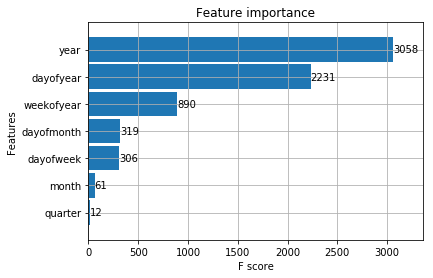

In [11]:
xgb.plot_importance(reg, height=0.9)

# 5. Define and draw predicitons

In [12]:
# Function for drawing plot
def plot_performance(data, date_from, date_to, title=None):
    plt.figure(figsize=(15,10))
    if title == None:
        plt.title('From {0} To {1}'.format(date_from, date_to))
    else:
        plt.title(title)
    plt.xlabel('time')
    plt.ylabel('DJIA')
    plt.plot(data.index, data, label='data')
    plt.plot(X.index, X_pred, label='prediction')
    plt.legend()
    plt.xlim(left=date_from, right=date_to)

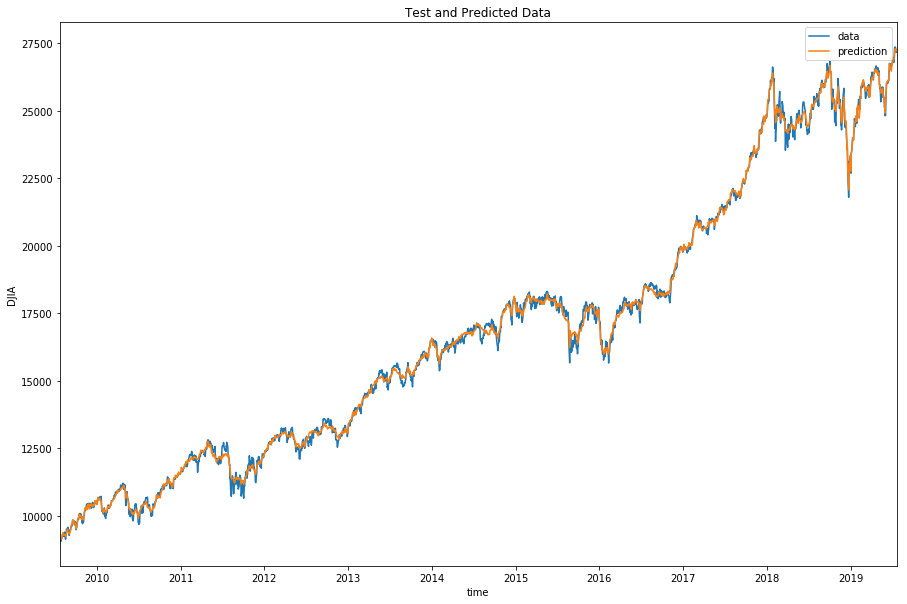

In [14]:
# Apply the function
X_pred = reg.predict(X)
plot_performance(y, y.index[0].date(), y.index[-1].date(),
                 'Test and Predicted Data')
plt.legend()
plt.show()

# 6. Define RMSE 

In [17]:
mean_squared_error(y_true=y,
                   y_pred=X_pred)

27161.66700941128